<a href="https://colab.research.google.com/github/Zeshawn-Martis/Breast-Cancer-prediction/blob/main/breastcr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import pandas as pd

data = pd.read_csv("data.csv")  # use the exact uploaded file name if different
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
print(data.head)

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [ ]:
print(data['diagnosis'].unique())

['M' 'B']


In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
print(data['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


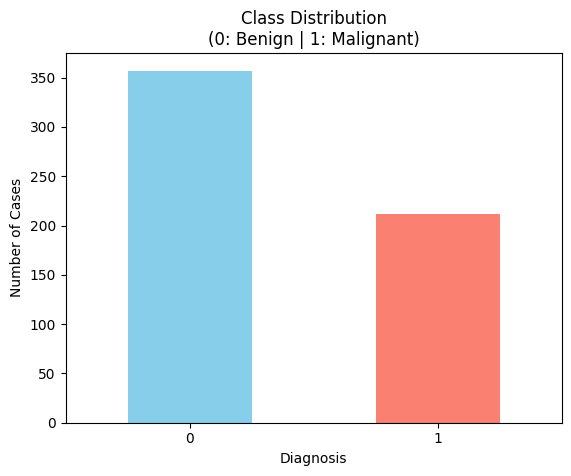

In [ ]:
import matplotlib.pyplot as plt

data['diagnosis'].value_counts().plot(kind='bar', color=["skyblue", "salmon"])
plt.title("Class Distribution\n(0: Benign | 1: Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Number of Cases")
plt.xticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd

# Load the original data
data = pd.read_csv("data.csv")

# Drop unnecessary column
if 'Unnamed: 32' in data.columns:
    data = data.drop(['Unnamed: 32'], axis=1)

# Drop rows with missing values (optional, or use imputer)
data = data.dropna()

# Encode diagnosis
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Confirm it's clean
print(data.shape)
print(data['diagnosis'].value_counts())

(569, 32)
diagnosis
0    357
1    212
Name: count, dtype: int64


In [ ]:
y = data['diagnosis']
X = data.drop(['diagnosis'], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Step 1: Create the model
lr = LogisticRegression()

# Step 2: Train the model on training data
lr.fit(X_train, y_train)

# Step 3: Predict on the test data
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

